# Projeto 3 de Ciência dos Dados

## Grupo:
    Lucas Hix
    Andrea Tessler
    Celso Diniz

# Objetivos:

Prever o preco dos jogos dentro da pataforma de jogos da valve, a Steam, utilizando metodos de regressao linear  com algumas variaveis como as avalicaoes positivas e negativas(regressao simples) e até algumas centenas de variaveis como quem desenvolveu, tempo medio passado dentro de cada jogo pela sua categoria ou ate mesmo a data de lancamento dos jogos.
A regressao linear é uma tecnica que nos permite estimar o valor/comportamento de certa variavel y em relavcao a uma ou mais variáveis explicativas X.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('steam.csv')
data.head(1)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19


In [3]:
data['rating'] = data['positive_ratings'] - data['negative_ratings']

In [4]:
new_owners = []

for x in data['owners']:
    new_owners.append(int(x.split('-')[0]))
    
data['profit'] = new_owners * data['price']
data.head(1)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,rating,profit
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19,121195,71900000.0


In [5]:
result = []
for x in data['genres']:
    result.extend(x.split(";"))
result = set(result)
generos = []
generos.extend(result)

In [6]:
result = []
for x in generos:
    subtabela = data[data['genres'].str.contains(x)]
    result.append(subtabela["price"].mean())
print(result)

[6.9445607013534305, 26.817241379310317, 2.91, 14.392671232876715, 7.8779349470499085, 5.972104283053982, 4.1061949069541726, 6.942147993505151, 11.322368421052635, 6.846612244897962, 7.2089834424338335, 3.98, 6.140368814584433, 26.788823529411776, 3.98, 7.050117187499913, 5.049866639204594, 27.726962025316446, 31.80225806451613, 4.320110650069142, 0.09916666666666663, 39.69607142857143, 61.68, 7.285977443609022, 11.253448275862072, 6.228351126927571, 6.121800239234548, 14.64333333333333, 7.039631008801699]


## O grafico abaixo foi feito para visualizar o preco em libras de cada jogo contido no data frame em funcao de seu preco de venda na plataforma da valve

A funcao deste grafico e dos outros abaixo é apenas facilitar a visualizacao e dar um norte para o desenvolvimento do projeto.

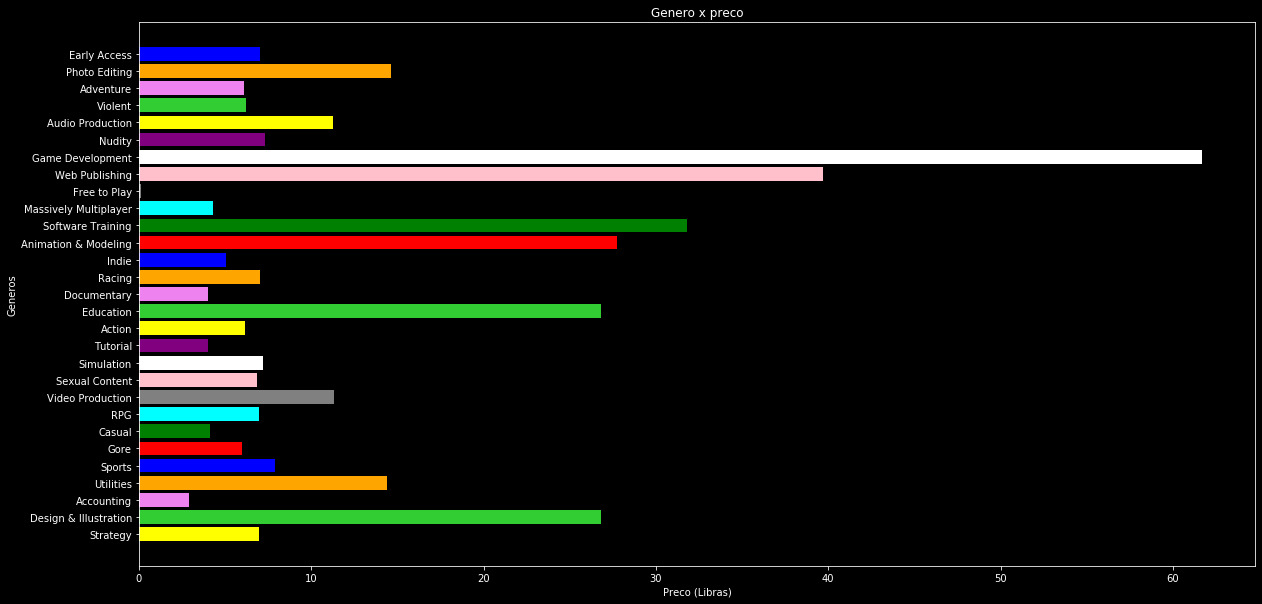

In [7]:
plt.rcParams['figure.figsize'] = (20,10)
plt.style.use('dark_background')
plt.barh(generos, result, color = ('yellow', 'limegreen', 'violet', 'orange', 'blue', 'red', 'green','cyan','gray', 'pink','white', 'purple'))
plt.title('Genero x preco')
plt.xlabel('Preco (Libras)') # em libras
plt.ylabel('Generos')
plt.show()

In [8]:
result = []
for x in data['categories']:
    result.extend(x.split(";"))
result = set(result)
categorias = []
categorias.extend(result)
print(categorias)

['Steam Leaderboards', 'VR Support', 'Cross-Platform Multiplayer', 'Includes level editor', 'Online Co-op', 'Mods (require HL2)', 'Includes Source SDK', 'Steam Cloud', 'Single-player', 'Multi-player', 'Partial Controller Support', 'Full controller support', 'Commentary available', 'Steam Achievements', 'Captions available', 'Shared/Split Screen', 'Steam Workshop', 'SteamVR Collectibles', 'Valve Anti-Cheat enabled', 'Steam Trading Cards', 'In-App Purchases', 'Local Multi-Player', 'MMO', 'Steam Turn Notifications', 'Mods', 'Stats', 'Online Multi-Player', 'Local Co-op', 'Co-op']


In [9]:
result = []
for x in categorias:
    subtabela = data[data['categories'].str.contains(x)]
    result.append(subtabela["average_playtime"].mean())
print(result);

/Users/celso/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


[166.54027333527188, 308.2597402597403, 536.4477335800185, 359.753861003861, 393.95891690009336, nan, 896.1142857142858, 195.9634298379277, 132.82989329387024, 371.2931555108203, 187.27231931979216, 145.72361720807726, 434.34722222222223, 165.3459306440198, 395.22052704576976, 114.52369888475836, 630.9520624303233, 656.95, 2094.68085106383, 275.6592573882294, 575.6492753623188, 122.07616099071207, 1028.7814726840854, 88.0952380952381, 532.5, 232.48615548455805, 295.8564535585042, 89.7610953729934, 359.7642089093702]


## Agora, o grafico abaixo mostra o tempo medio em minutos jogados por categoria de jogos

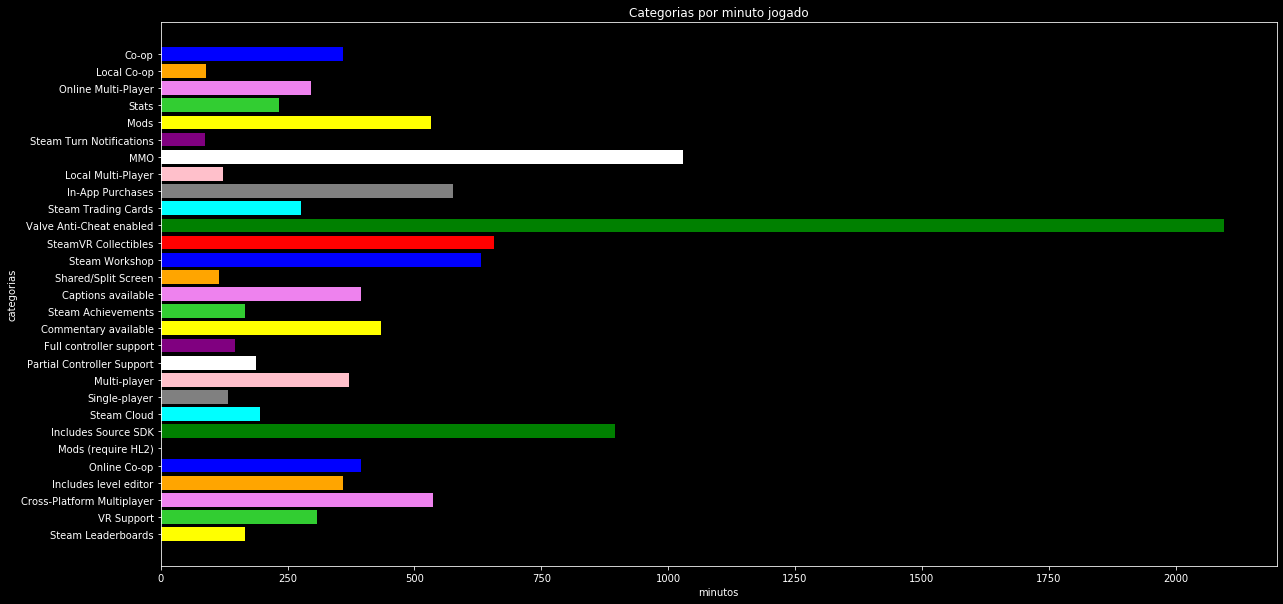

In [10]:
plt.barh(categorias, result, color = ('yellow', 'limegreen', 'violet', 'orange', 'blue', 'red', 'green','cyan','gray', 'pink','white', 'purple'))
plt.xlabel('minutos')
plt.ylabel('categorias')
plt.title('Categorias por minuto jogado');

In [11]:
result = []
for x in generos:
    subtabela = data[data['genres'].str.contains(x)]
    result.append(subtabela["rating"].mean())
print(result)

[683.779493043644, 828.551724137931, 2.3333333333333335, 526.0616438356165, 383.3343419062027, 200.1024208566108, 225.1794319294809, 1068.1902110879146, 474.3157894736842, 429.2122448979592, 653.1420870234887, 0.0, 1225.1689490044528, 48.35294117647059, 0.0, 525.2490234375, 448.79856855980637, 1054.7848101265822, 61.935483870967744, 1584.0235131396958, 3445.81103286385, 288.14285714285717, 64.70588235294117, 610.1691729323309, 31.862068965517242, 173.36654804270464, 636.6733452950558, 53.083333333333336, 266.3500338524035]


## Este ultimo serve para visualizar de uma forma mais clara as avaliacoes media de cada jogo separado por generos
Podemos notar um certa vantagem em jogos do genero 'Free to play'.

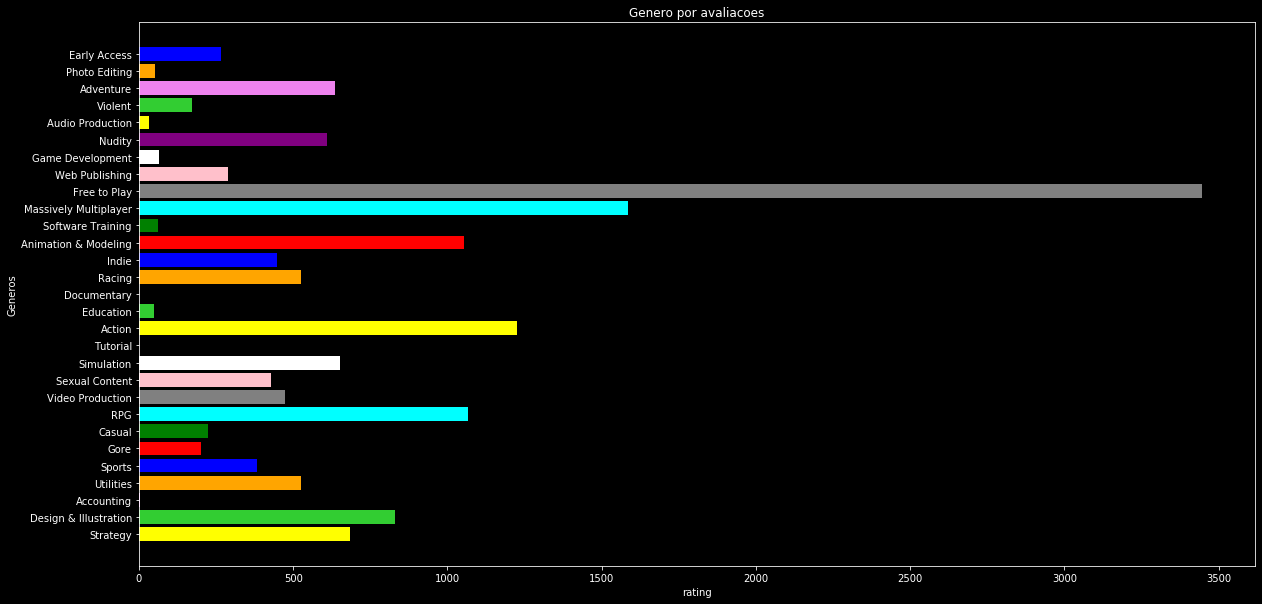

In [12]:
plt.barh(generos, result, color = ('yellow', 'limegreen', 'violet', 'orange', 'blue', 'red', 'green','cyan','gray', 'pink','white', 'purple'))
plt.xlabel('rating')
plt.ylabel('Generos')
plt.title('Genero por avaliacoes');

# inicio do processamento de dados
A partir desta etapa, vamos analisar os dados obtidos no site da valve para determinar o preco medio de cada jogo de acordo com certas categorias comecando pelo preco medio de acordo com as avaliacoes dos jogadores, sendo positivo e negativo

In [13]:
# bibliotecas necessarias para esta segunda parte do projeto:
import numpy as np
# Tirar warnigns e linhas vermelhas de excesso de dados/processamento
import warnings
warnings.filterwarnings('ignore')

In [14]:
# Abre o CSV em um DataFrame
data = pd.read_csv('steam.csv')

# Remove identificador interno do jogo na steam
data = data.drop(columns="appid")

# Transforma todas as strings dentro do dataframe em minusculo
for coluna in ["developer", "publisher", "platforms", "categories", "genres", "steamspy_tags"]:
    data[coluna] = data[coluna].str.lower()

# Printa um exemplo
data.head(1)

,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,Counter-Strike,2000-11-01,1,valve,valve,windows;mac;linux,0,multi-player;online multi-player;local multi-p...,action,action;fps;multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19


In [15]:
# Separa a quantidade de pessoas que possuim o jogo em seu maximo e minimo

# Lista de suporte
owners_min = []
owners_max = []

# Itera sobre os valores das quatidades
for amount in data["owners"]:
    # Separa os valores de minimo e maximo
    amounts = amount.split("-")
    
    # Adiciona o valor respectivo a lista
    owners_min.append(int(amounts[0]))
    owners_max.append(int(amounts[1]))

# Gera as duas novas colunas
data["owners min"] = owners_min    
data["owners max"] = owners_max

# Remove coluna antiga
data = data.drop(columns="owners")

# Printa um exemplo
data.head(1)

,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price,owners min,owners max
0,Counter-Strike,2000-11-01,1,valve,valve,windows;mac;linux,0,multi-player;online multi-player;local multi-p...,action,action;fps;multiplayer,0,124534,3339,17612,317,7.19,10000000,20000000


In [16]:
# Separa a data em ano dia e mês

# Listas de suporte
year = []
month = []
day = []

# Itera sobre a data de lancemento
for time in data["release_date"]:
    # Separa em seus valores
    times = time.split("-")
    
    # Separa em ano mês e dia
    year.append(times[0])
    month.append(times[1])
    day.append(times[2])

# Gera as novas colunas
data["release_year"] = year
data["release_month"] = month
data["release_day"] = day

# Remove coluna antiga
data = data.drop(columns="release_date")

# Printa um exemplo
data.head(1)

,name,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price,owners min,owners max,release_year,release_month,release_day
0,Counter-Strike,1,valve,valve,windows;mac;linux,0,multi-player;online multi-player;local multi-p...,action,action;fps;multiplayer,0,124534,3339,17612,317,7.19,10000000,20000000,2000,11,01


 As linhas abaixo esta muito pesada de carregar de forma rapida, como nos ja possuimos o data frame anteriormente, optamos por deixar em comentarios para facilitar a leitura. Para executar, basta retirar as aspas.

In [17]:

# Transforma todas as colunas quali em dummy

for quali in ["platforms","categories","genres", "steamspy_tags"]:
    new_c = 0
    
    # Para cada elemento da coluna quali
    for element in set(data[quali].str.cat(sep=";").split(";")):
        # Verfica para eveitar duplicatas (SteamSpy)
        if element not in data: 
        # Transforma em uma coluna dummy
            data[element] = np.where(data[quali].str.contains(element), 1, 0)
            new_c += 1
    
    print("Coluna Quali \"{0}\" processada, gerando {1} colunas dummy".format(quali, new_c))
    data = data.drop(columns=quali)
    
data.head(1)



Coluna Quali "platforms" processada, gerando 3 colunas dummy
Coluna Quali "categories" processada, gerando 29 colunas dummy
Coluna Quali "genres" processada, gerando 29 colunas dummy
Coluna Quali "steamspy_tags" processada, gerando 309 colunas dummy


,name,english,developer,publisher,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,...,metroidvania,card game,nonlinear,tactical rpg,platformer,replay value,rhythm,character customization,robots,dark humor
0,Counter-Strike,1,valve,valve,0,0,124534,3339,17612,317,...,0,0,0,0,0,0,0,0,0,0


In [18]:


# Separa os desenvolvedores e publicadores

options = []
options.extend(data["developer"].str.cat(sep=";").split(";"))
options.extend(data["publisher"].str.cat(sep=";").split(";"))

new_c = 0
error = 0

for quali in set(options):
    if quali not in data:
        try:
            data[quali] = np.where(data["publisher"].str.contains(quali) | data["developer"].str.contains(quali), 1, 0)
            new_c += 1
        except:
            print("ANTI-BUG: Ignorando Linha \"{0}\"".format(quali))
            print()
            error += 1
    
print("Desenvolvedores e publicadores processados, gerando {0} colunas dummy com {1} linhas puladas".format(new_c, error))

data = data.drop(columns="developer")
data = data.drop(columns="publisher")

data.head(1)




ANTI-BUG: Ignorando Linha "+mpact games, llc."

ANTI-BUG: Ignorando Linha "][ games inc"

ANTI-BUG: Ignorando Linha "++good games"

ANTI-BUG: Ignorando Linha "+7 software"

ANTI-BUG: Ignorando Linha "games++"

Desenvolvedores e publicadores processados, gerando 20044 colunas dummy com 5 linhas puladas


,name,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price,owners min,...,tavern games,wonderstruck,lab132,tm xr lab,radiostatic,rocwise entertainment,the artistocrats,fireballed studio,airwolt,manipulation machine
0,Counter-Strike,1,0,0,124534,3339,17612,317,7.19,10000000,...,0,0,0,0,0,0,0,0,0,0


In [19]:

# Salva o DataFram para um CSV

data.to_csv("steam_teste.csv")

print("CSV SALVADO!")



CSV SALVADO!


# Parte 3: 
Apos o processamento inicial, vamos dar inicio a analise de X e Y (explicar o que e o y depois), regressao simples. Este método serve para colacar uma reta que minimiza as distâncias entre os valores estimados e os valores observados.

In [20]:
# bibliotecas utilizadas nesta 3a parte
from scipy import stats
from scipy.stats import probplot, norm, t
import seaborn as sns
sns.set(rc={'figure.figsize':(20,10)})
sns.set()


Para analise:
* X:positive_ratings, negative_ratings, price
* Y: tudo menos X + name, developer e publisher
* X = playtime
 a qualidade das informacoes
A distancia entre os pontos observados ate a reta, sao nossos residuos e estes sao utilizados para ajustar o modelo/grafico e a qualidade das informacoes contidas nele.

In [21]:
#beta^0 e beta^1 de ratings positivos
# beta é a influencia/efeito da variavel explicativa de entrada sobre a variavel de resposta/saida
df =  pd.read_csv('steam_processada_parcial.csv')
x = df['price']
y = df['positive_ratings']

yb = y.mean()
xb = x.mean()

Sxy = ((x -xb)*(y -yb)).sum()
Sxx = ((x -xb)**2).sum()

b1 = Sxy/Sxx
b0 = yb - b1*xb

print("beta0: {0}".format(b0))
print("beta1: {0}".format(b1))

beta0: 471.32611908127353
beta1: 87.07067856993659


In [22]:
x_v = np.linspace(x.min(), x.max(), 500)
y_v = b0 + b1*x_v

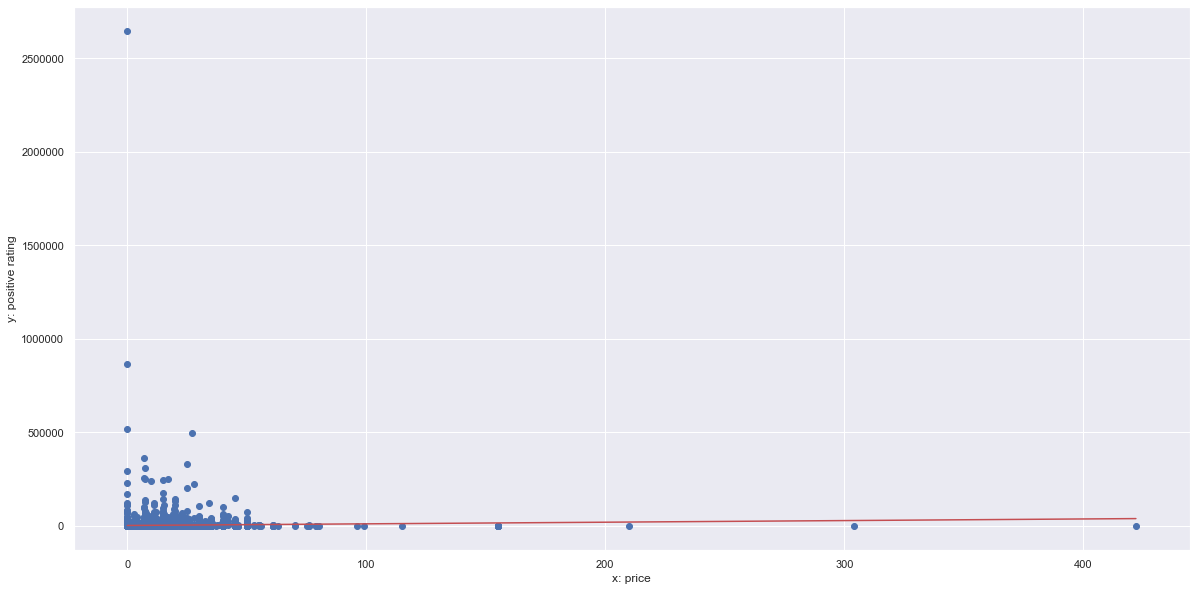

In [23]:
plt.plot(x_v,y_v, color="r") # resultados da regressão
plt.scatter(x, y); # dados
plt.xlabel("x: price");
plt.ylabel("y: positive rating");

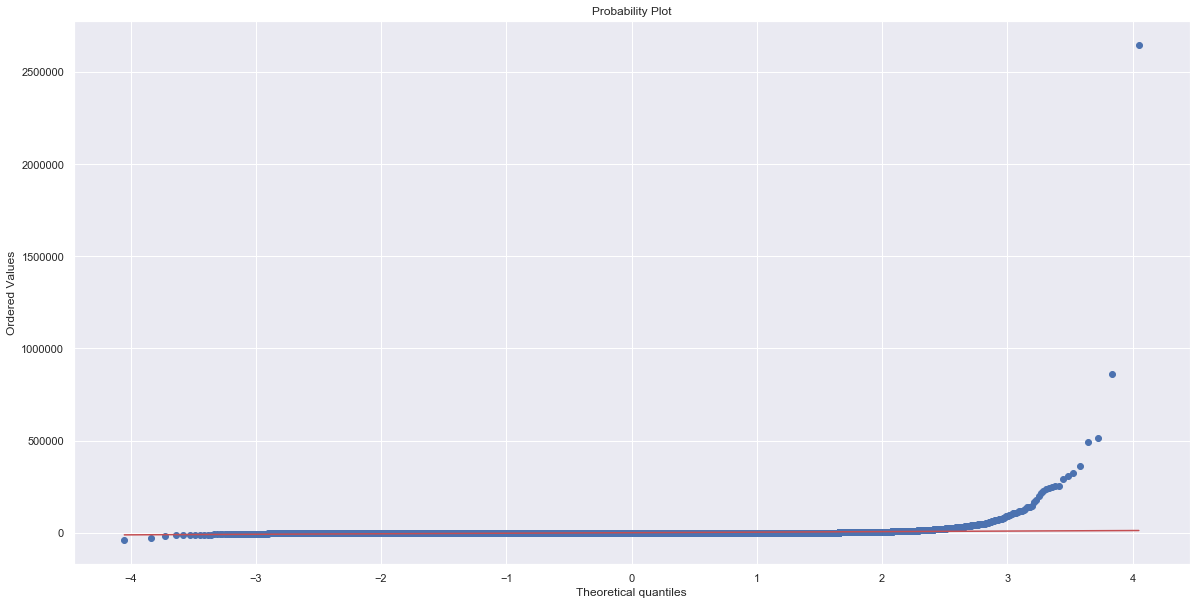

In [24]:
e = y - (b0 + b1*x)
stats.probplot(e, dist='norm', plot=plt);

In [25]:
import statsmodels.api as sm
x = df['price'] 
y = df['positive_ratings']    
xc = sm.add_constant(x) 
model = sm.OLS(y,xc)    
results = model.fit()   
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       positive_ratings   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     35.35
Date:                Fri, 22 Nov 2019   Prob (F-statistic):           2.79e-09
Time:                        17:32:34   Log-Likelihood:            -3.0513e+05
No. Observations:               27075   AIC:                         6.103e+05
Df Residuals:                   27073   BIC:                         6.103e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        471.3261    145.687      3.235      0.001     185.772     756.880
price         87.0707     14.645      5.945      0.000      58.365     115.776
==============================================================================
Omnibus:                   109697.248   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     225381231601.452
Skew:                         106.361   Prob(JB):                         0.00
Kurtosis:                   14135.893   Cond. No.                         12.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

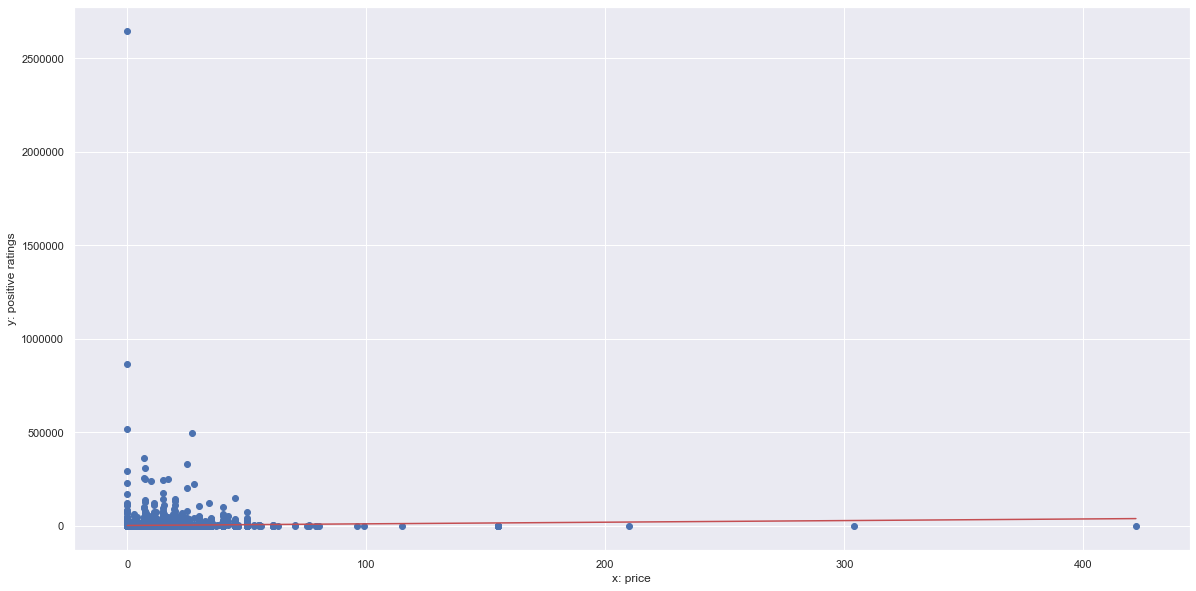

In [26]:
x_vc = sm.add_constant(x_v)
y_vc = results.predict(x_vc)
plt.plot(x_v, y_vc, color="r")
plt.scatter(x,y);
plt.xlabel("x: price");
plt.ylabel("y: positive ratings");

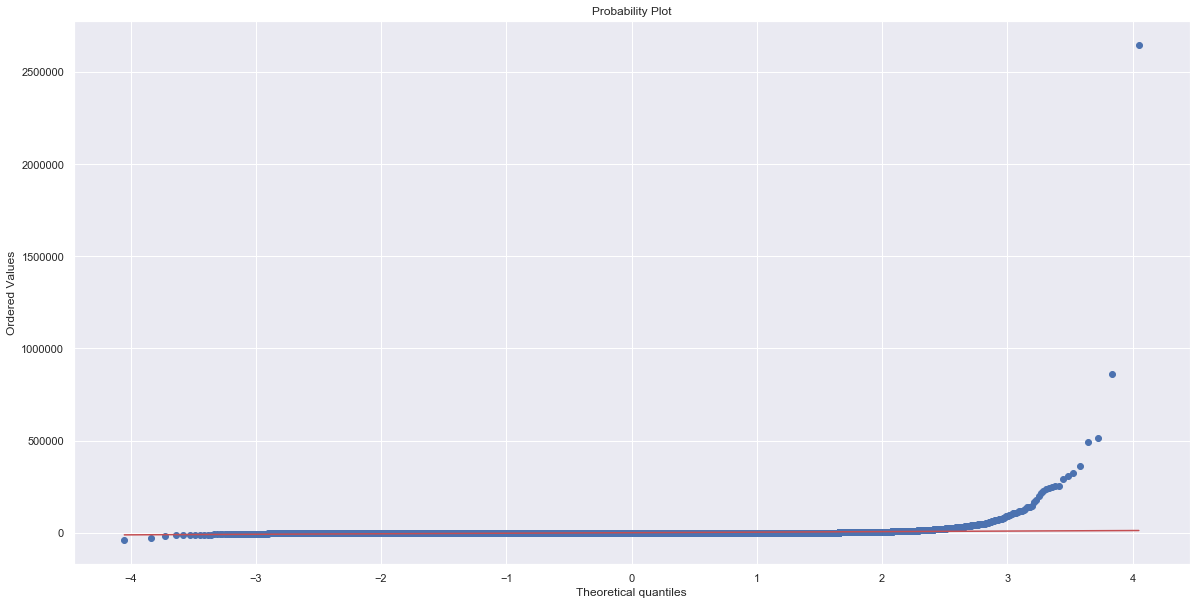

In [27]:
stats.probplot(results.resid, dist="norm", plot=plt);

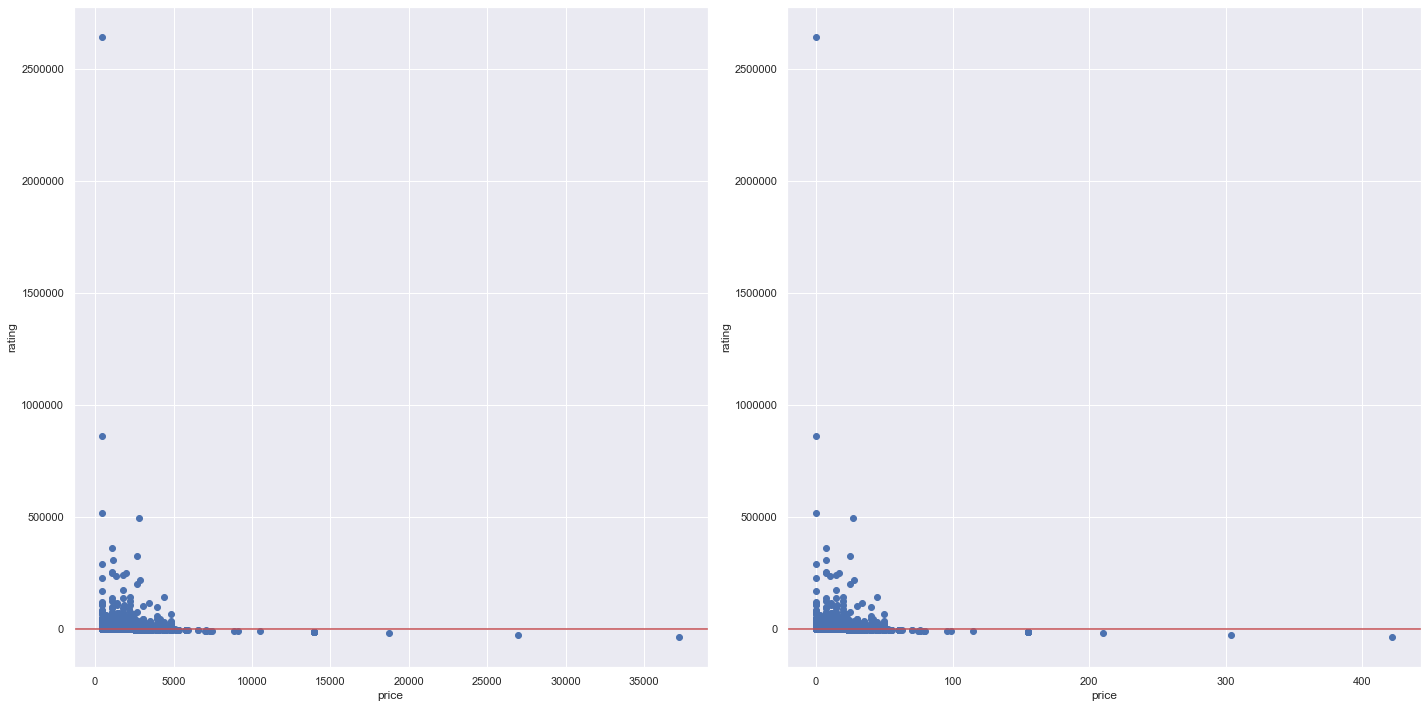

In [28]:
fig = plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.scatter(results.predict(xc),results.resid); #xc contem matriz de planejamento usada no ajuste OLS 
plt.axhline(y=0, color='r', linestyle='-');
plt.ylabel('rating')
plt.xlabel('price')

plt.subplot(122)
plt.scatter(x,results.resid); #x contem apenas a variável independente utilizada no ajuste linear
plt.axhline(y=0, color='r', linestyle='-');
plt.ylabel('rating')
plt.xlabel('price')

plt.tight_layout()
plt.show()

Podemos observas que os pontos/residuos nem sempre estao proximos da reta e isso é devido ao nosso grande numero de variaveis e outliers(numeros gritantes ou bem divergentes).

# Regressao simples de rating negativos
As mesmas observacoes dos graficos positivos de ratings vale para os negativos, em relacao ao numero de variaveis e outliers.

In [29]:
#beta^0 e beta^1
df =  pd.read_csv('steam_processada_parcial.csv')
x = df['price']# pegar somente 30 linhas
y = df['negative_ratings']

yb = y.mean()
xb = x.mean()

Sxy = ((x -xb)*(y -yb)).sum()
Sxx = ((x -xb)**2).sum()

b1 = Sxy/Sxx
b0 = yb - b1*xb

print("beta0: {0}".format(b0))
print("beta1: {0}".format(b1))

beta0: 41.49947809720945
beta1: 27.891128836445176


In [30]:
x_v = np.linspace(x.min(), x.max(), 500)
y_v = b0 + b1*x_v

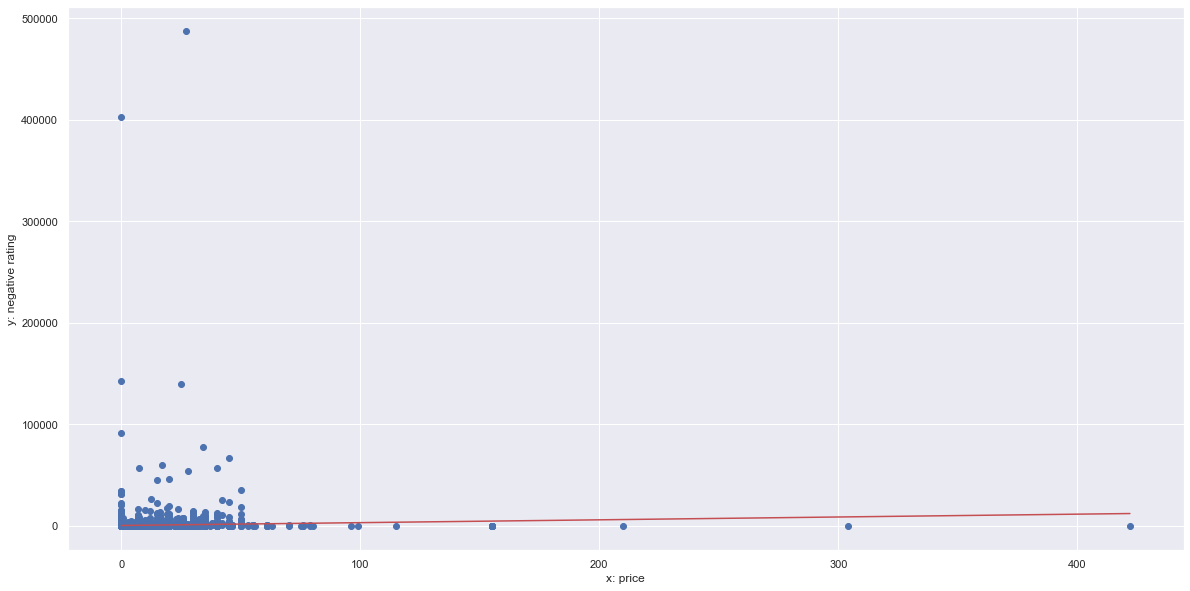

In [31]:
plt.plot(x_v,y_v, color="r") # resultados da regressão
plt.scatter(x, y); # dados
plt.xlabel("x: price");
plt.ylabel("y: negative rating");

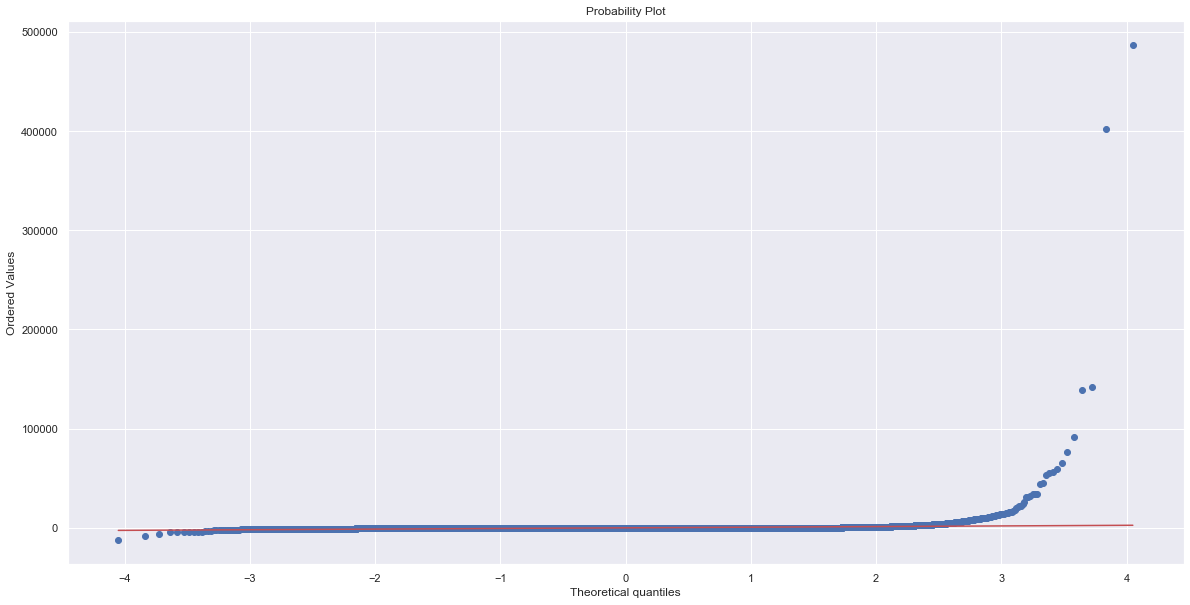

In [32]:
e = y - (b0 + b1*x) # Escreva sua fórmula dos resíduos aqui

stats.probplot(e, dist='norm', plot=plt); # Verifique graficamente  se é uma normal - como fazer isso?

In [33]:
x = df['price'] # Definindo renda como explicativa
y = df['negative_ratings']    # Definindo CO2 como resposta

xc = sm.add_constant(x) # Adiciona coluna de 1s para estimar intercepto
model = sm.OLS(y,xc)    # Define o modelo
results = model.fit()   # Faz o ajuste
results.summary()       # Mostra os resultados

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       negative_ratings   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     71.32
Date:                Fri, 22 Nov 2019   Prob (F-statistic):           3.19e-17
Time:                        17:32:38   Log-Likelihood:            -2.6481e+05
No. Observations:               27075   AIC:                         5.296e+05
Df Residuals:                   27073   BIC:                         5.296e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.4995     32.853      1.263      0.207     -22.895     105.894
price         27.8911      3.303      8.445      0.000      21.418      34.364
==============================================================================
Omnibus:                   103499.078   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      94397338898.114
Skew:                          88.788   Prob(JB):                         0.00
Kurtosis:                    9148.752   Cond. No.                         12.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

rˆ2: porcentagem de y (variavel de saida) explicado pelos regressores utilizados, neste caso R-squared:	0.003

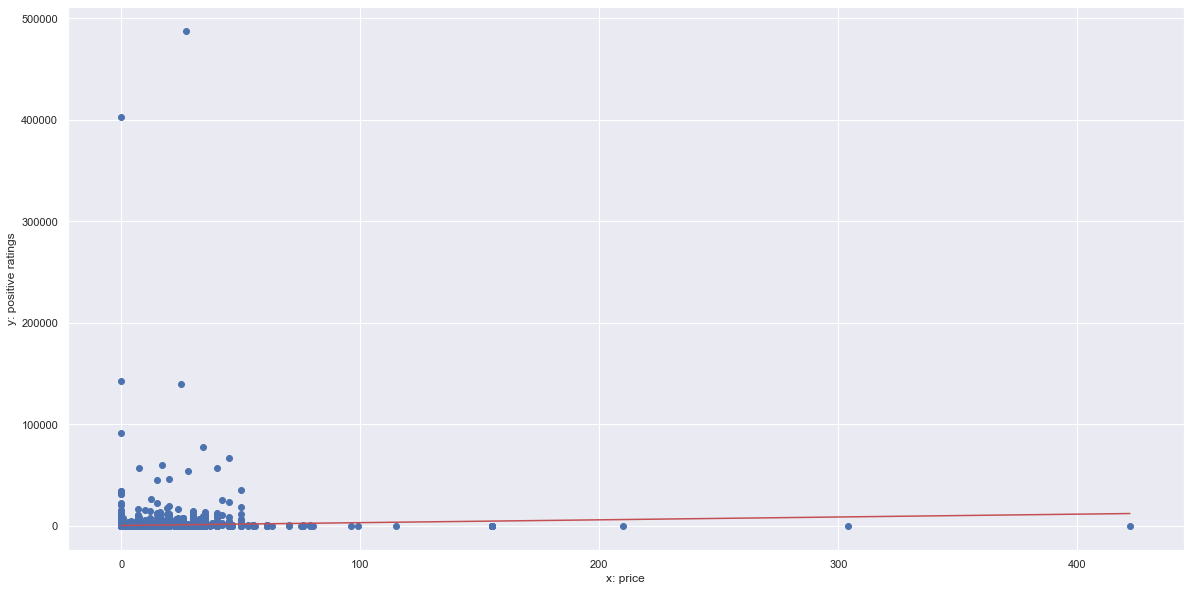

In [34]:
x_vc = sm.add_constant(x_v)
y_vc = results.predict(x_vc)
plt.plot(x_v, y_vc, color="r")
plt.scatter(x,y);
plt.xlabel("x: price");
plt.ylabel("y: positive ratings");

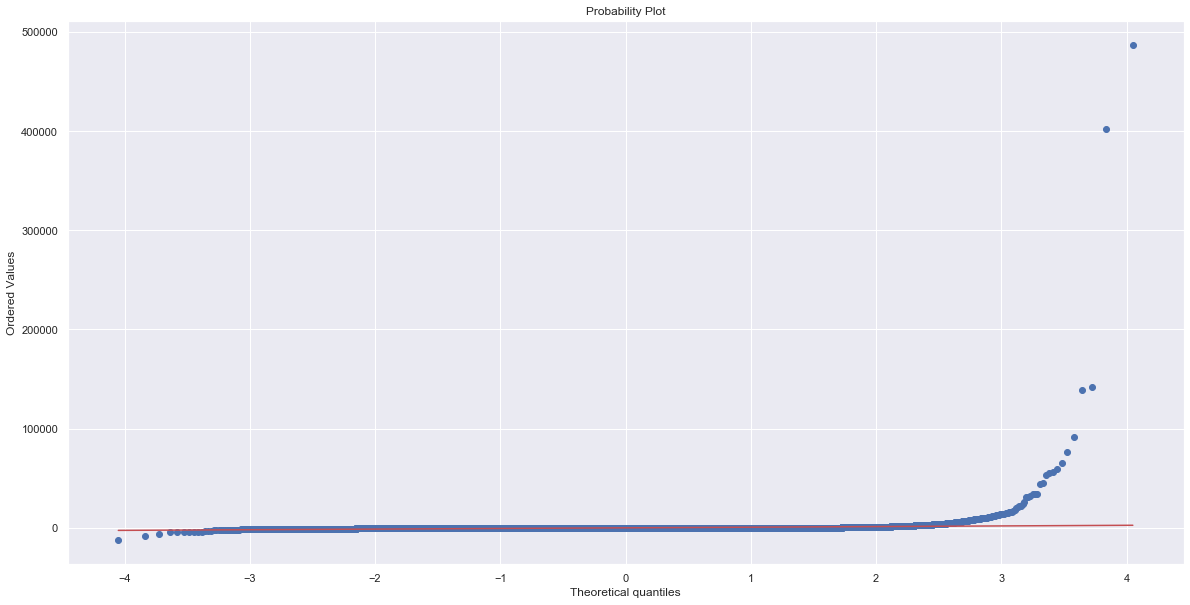

In [35]:
stats.probplot(results.resid, dist="norm", plot=plt);

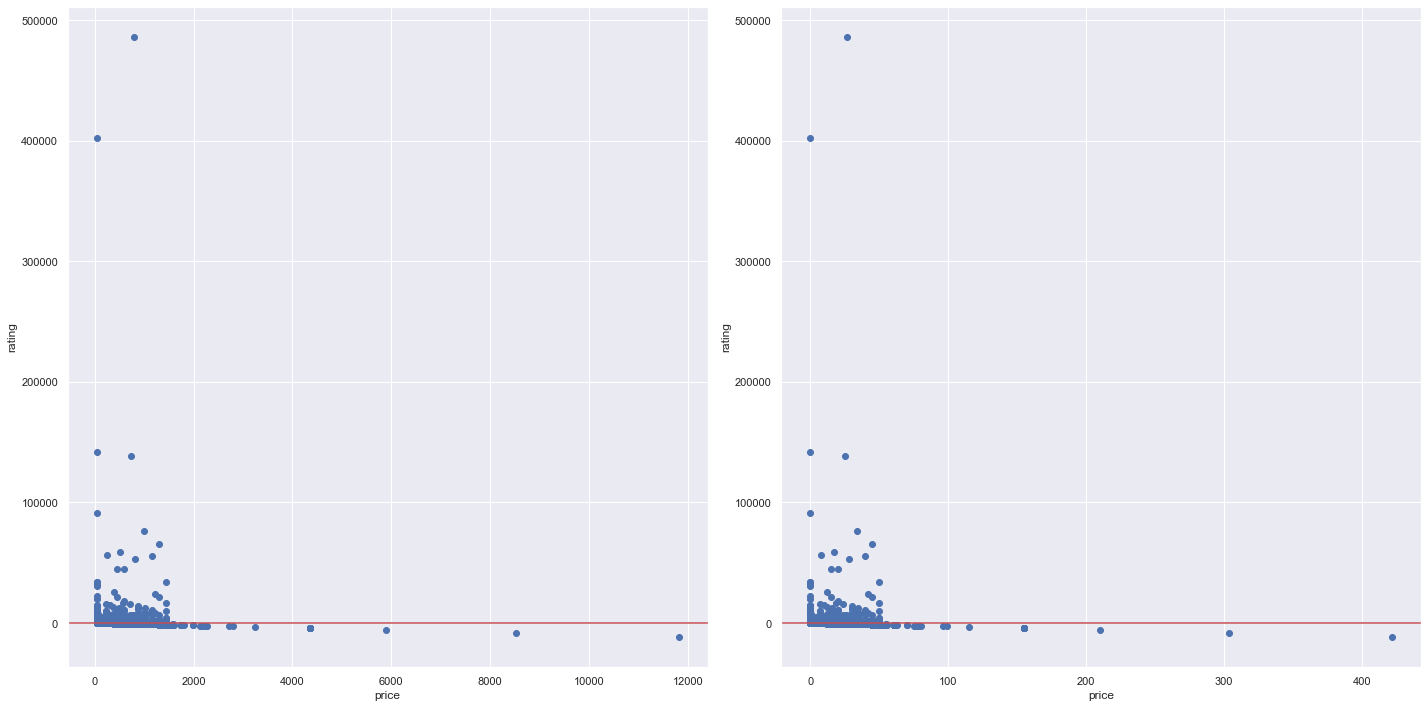

In [36]:
fig = plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.scatter(results.predict(xc),results.resid); #xc contem matriz de planejamento usada no ajuste OLS 
plt.axhline(y=0, color='r', linestyle='-');
plt.ylabel('rating')
plt.xlabel('price')

plt.subplot(122)
plt.scatter(x,results.resid); #x contem apenas a variável independente utilizada no ajuste linear
plt.axhline(y=0, color='r', linestyle='-');
plt.ylabel('rating')
plt.xlabel('price')

plt.tight_layout()
plt.show()

# Parte 4: regressao multipla

In [57]:
# bibliotecas para a parte 4
from scipy import stats
from scipy.stats import probplot, norm, t

In [58]:
#Função utilitária para fazer a regressão com constante adicionada
def regress(X,Y):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    return results

In [59]:
data = pd.read_csv('steam_processada_parcial.csv')

In [60]:
Y = data['price']
lista_x = list(data.columns)
lista_x.remove("Unnamed: 0")
lista_x.remove("price")
lista_x.remove("developer")
lista_x.remove("publisher")
lista_x.remove("name")
X=data[lista_x]
X.head()

,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners min,owners max,release_year,...,god game,top-down,character customization,real-time with pause,bikes,survival,underwater,1980s,time management,mystery dungeon
0,1,0,0,124534,3339,17612,317,10000000,20000000,2000,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,3318,633,277,62,5000000,10000000,1999,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,3416,398,187,34,5000000,10000000,2003,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1273,267,258,184,5000000,10000000,2001,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,5250,288,624,415,5000000,10000000,1999,...,0,0,0,0,0,0,0,0,0,0


In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [62]:
results = regress(X_train,Y_train)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     25.44
Date:                Fri, 22 Nov 2019   Prob (F-statistic):               0.00
Time:                        17:39:05   Log-Likelihood:                -72247.
No. Observations:               21660   AIC:                         1.452e+05
Df Residuals:                   21283   BIC:                         1.483e+05
Df Model:                         376                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                              -555.4518     55.943     -9.929      0.000    -665.104    -445.800
english                              -0.0432      0.357     -0.121      0.904      -0.743       0.656
required_age                          0.1941      0.021      9.440      0.000       0.154       0.234
achievements                       9.143e-05      0.000      0.683      0.495      -0.000       0.000
positive_ratings                  -7.284e-06   3.89e-06     -1.874      0.061   -1.49e-05    3.36e-07
negative_ratings                      0.0001    2.1e-05      6.358      0.000    9.25e-05       0.000
average_playtime                   6.694e-05   6.39e-05      1.047      0.295   -5.84e-05       0.000
median_playtime                    2.694e-05   4.81e-05      0.560      0.576   -6.74e-05       0.000
owners min                        -2.084e-06   9.07e-07     -2.296      0.022   -3.86e-06   -3.05e-07
owners max                         7.015e-07   4.03e-07      1.739      0.082   -8.92e-08    1.49e-06
release_year                          0.2763      0.028      9.986      0.000       0.222       0.331
release_month                         0.0392      0.014      2.821      0.005       0.012       0.066
release_day                           0.0115      0.005      2.164      0.030       0.001       0.022
mac                                   0.3367      0.136      2.467      0.014       0.069       0.604
windows                               1.8764      3.081      0.609      0.542      -4.162       7.915
linux                                -0.5072      0.158     -3.220      0.001      -0.816      -0.198
co-op                                 0.9081      0.311      2.924      0.003       0.299       1.517
steam trading cards                   0.6506      0.120      5.432      0.000       0.416       0.885
shared/split screen                   0.0215      0.239      0.090      0.928      -0.446       0.489
stats                                -0.4743      0.201     -2.365      0.018      -0.867      -0.081
mods                                 -3.2274      5.128     -0.629      0.529     -13.278       6.824
steam leaderboards                   -0.1185      0.162     -0.729      0.466      -0.437       0.200
partial controller support            0.7386      0.143      5.164      0.000       0.458       1.019
valve anti-cheat enabled              4.3490      0.918      4.735      0.000       2.549       6.149
mmo                                  -0.0381      0.548     -0.070      0.945      -1.112       1.035
steam cloud                           1.6428      0.124     13.262      0.000       1.400       1.886
includes source sdk                   0.0023      1.408      0.002      0.999      -2.757       2.762
full controller support

Nesta regressao multipla, envolvendo uma grande quantidade de variaveis de influencia e outliers na analise, nosso R-squared:	0.310

In [63]:
X_test.shape

(5415, 382)

In [64]:
X_test_const = sm.add_constant(X_test)
X_test_const["const"]=1
X_test_const.head()

,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners min,owners max,release_year,...,top-down,character customization,real-time with pause,bikes,survival,underwater,1980s,time management,mystery dungeon,const
151,1,0,0,575,55,801,801,100000,200000,2009,...,0,0,0,0,0,0,0,0,0,1
16974,1,0,1,14,13,0,0,0,20000,2017,...,0,0,0,0,0,0,0,0,0,1
11436,1,0,9,19,15,0,0,0,20000,2016,...,0,0,0,0,0,0,0,0,0,1
16469,1,0,0,2,0,0,0,0,20000,2017,...,0,0,0,0,0,0,0,0,0,1
759,1,0,47,5336,903,1834,2894,1000000,2000000,2010,...,0,0,0,0,0,0,0,0,0,1


In [65]:
y_pred = results.predict(X_test_const)

In [66]:
from sklearn.metrics import mean_squared_error
print('Acurácia: {}'.format(mean_squared_error(Y_test, y_pred)))

Acurácia: 287886.9963673384


In [67]:
# negativo devido a alguns outliers
from sklearn.metrics import r2_score
print('Acurácia: {}'.format(r2_score(Y_test, y_pred)))

Acurácia: -6831.413665165799


In [68]:
from sklearn.metrics import mean_absolute_error
print('Acurácia: {}'.format(mean_absolute_error(Y_test, y_pred)))

Acurácia: 530.2146439830018


In [69]:
from sklearn.metrics import median_absolute_error
print('Acurácia: {}'.format(median_absolute_error(Y_test, y_pred)))

Acurácia: 543.9951796077721


Novamente, nossos valores de acuracia/ Rˆ2 deram um pouco alterados neste tipo de regressao devido ao grande numero de outliers e variáveis que divergem muito de valor. Uma maneira de deixar mais aproximando em uma analise futura seria filtrar variaveis proximas de valor e utiliza-las de forma proporcional. Por exemplo, a categoria A possui x casas decimais e a categoria B y casas decimais. Para uma anlise vamos agrupar variavies de comprimento x com x e y com y.

In [70]:
a = data
a.to_excel('teste.xlsx')

# parte 5: decision tree 

Este metodo de arvore de decisoes consite em dividior dados em subconjuntods de forma a deixa-los mais puros, a medida que so irao somente conter as variaveis alvo.
Como estamos trabalhan do com um grande numero de variaveis, acabamos optando por nao deixar as arvores de forma grafica, devido a dificuldade de gerar e visualizar todas as arvores de maneira mais clara. Por conta disso esete modelo pode ser o mais indicado para este tipo de analise.

In [71]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor # arvore de desições
from sklearn.model_selection import train_test_split # separador
import warnings
warnings.filterwarnings('ignore')

In [72]:
data = pd.read_excel('teste.xlsx') 
data = data.drop(columns=["Unnamed: 0", "Unnamed: 0.1"]) # remove colunas criadas pelo excel
data = data.set_index("name") # renomeia o index para o nome do jogo

data.head(1) # visulaizar brevemente os dados obtidos

,english,developer,publisher,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price,...,god game,top-down,character customization,real-time with pause,bikes,survival,underwater,1980s,time management,mystery dungeon
name,,,,,,,,,,,,,,,,,,,,,
Counter-Strike,1,valve,valve,0,0,124534,3339,17612,317,7.19,...,0,0,0,0,0,0,0,0,0,0


Nossas variaveis de entrada X serao: avaliacoes positivas e negativas, tempo medio jogado e preco do jogo.

In [73]:
X = data.loc[:, ["positive_ratings", "negative_ratings", "average_playtime", "price"]] # Os X escolidos
y = data
y = y.drop(columns=["developer", "publisher"]) # remove colunas invalidas
y.head(1) # printa pequeno exemplo

,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price,owners min,owners max,...,god game,top-down,character customization,real-time with pause,bikes,survival,underwater,1980s,time management,mystery dungeon
name,,,,,,,,,,,,,,,,,,,,,
Counter-Strike,1,0,0,124534,3339,17612,317,7.19,10000000,20000000,...,0,0,0,0,0,0,0,0,0,0


In [74]:
# Separa os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% treino e 30% teste

In [75]:
# Cria o classificador
clf = DecisionTreeRegressor()
# Treina o classificador
clf = clf.fit(X_train, y_train)

In [76]:
# Calcula a acuracia do classificador
print("Accuracy:", clf.score(X_test, y_test))
#Showtree(DecisionTree().fit(inputs,valores), list(inputs.columns), '.tree.png');
# devido ao grande numero de arvores, optamos por ocultar sua visualizaca

Accuracy: 0.5005759616292605


Analisando os acurarias dos métodos usado acreditamos que o melhor método de predicao é decision tree, por ter uma taxa de acerto melhor que as demais devido que a saida nos deu uma margem de acerto de 46%. Um numero ate que aceitavel devido ao grande numero de outliers e como esperado este foi o mehlhor modelo devido a analise mais pura das variaveis.